In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
import os
from src.dataPipeline import DataPipeline


os.chdir('..')

imputer = KNNImputer(n_neighbors=5)
dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=False, imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:42: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:65: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [2]:
inputs_nums = len(df.columns) - 1
print(f'input nums: {inputs_nums}')

input nums: 180


In [3]:
df

,Floor,detail_responsive#surface_usable,Floor_space_merged,ForestDensityM,ForestDensityS,RiversAndLakesL,RiversAndLakesM,RiversAndLakesS,distanceToTrainStation,gde_area_forest_percentage,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
0,4.0,187.2,159.2,0.286451,0.090908,0.082170,0.001811,0.011871,3.038467,51.449275,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.4,191.8,242.0,0.286451,0.090908,0.082170,0.001811,0.011871,3.038467,51.449275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,162.0,112.6,0.095877,0.001911,0.154274,0.188229,0.000000,0.909587,32.197891,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.2,191.8,257.0,0.286451,0.090908,0.082170,0.001811,0.011871,3.038467,51.449275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,197.6,228.0,0.279276,0.145835,0.109586,0.141473,0.091805,1.460245,49.705635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21113,0.8,67.8,100.8,0.385885,0.097278,0.000000,0.000000,0.000000,1.375319,29.028213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21114,3.8,207.2,249.2,0.000000,0.000000,0.013997,0.000000,0.000000,1.067011,30.599295,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21115,0.0,233.2,318.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.230859,30.599295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21116,1.8,167.8,149.8,0.151363,0.038351,0.026686,0.021426,0.000000,0.357339,26.718547,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
from src import torchModelRun
import torch
import torch.nn as nn
import torch.nn.functional as F

inputs_nums = len(df.columns) - 1

class FullyConnectedModel(nn.Module):
    import torch.nn.functional as F
    def __init__(self):
        super(FullyConnectedModel, self).__init__()
        self.fc1 = nn.Linear(inputs_nums, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x
    

models = torchModelRun.run(FullyConnectedModel, df, 5)

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: denis-schatzmann. Use `wandb login --relogin` to force relogin


Epoch 1, Loss: 187.93222057458127, Train MAPE: 100460667.64772727, Test MAPE: 102455699.45454545
Epoch 2, Loss: 175.49296270717275, Train MAPE: 56922571.16477273, Test MAPE: 58095118.303030305
Epoch 3, Loss: 153.27358846953422, Train MAPE: 12454093.733901516, Test MAPE: 12710159.159090908
Epoch 4, Loss: 71.08589926362038, Train MAPE: 2936.224909291123, Test MAPE: 3020.187767837987
Epoch 5, Loss: 7.585397704984203, Train MAPE: 414.28956976081383, Test MAPE: 428.32844731301975
Epoch 6, Loss: 5.064505907622251, Train MAPE: 314.87620028221244, Test MAPE: 324.0512496774847
Epoch 7, Loss: 3.798069681690046, Train MAPE: 238.35246442303514, Test MAPE: 244.78757851051563
Epoch 8, Loss: 3.0200389346220726, Train MAPE: 218.60845097267267, Test MAPE: 223.7469475486062
Epoch 9, Loss: 2.501974813781227, Train MAPE: 171.69026657306787, Test MAPE: 175.20225782105416
Epoch 10, Loss: 2.1363609416240994, Train MAPE: 170.29460652669272, Test MAPE: 173.30349676536792
Epoch 11, Loss: 1.8641901387635507, Tra

test_loss,█▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_mape,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
time_test,▂▁▄▂▅▇▂█▃▂▄▃▂▅▂▂▂▁▃▃▁▂▃▄▁▅▂▁▁▁▅▁▁▁▁▁▁▂▁▁
time_train,▁▂▂▅▄█▁▂▁█▂▁▁▂▁▂▇▃▁▁▂▁▃▂▂▂▁▄▂▂▁▁▂▁▂▂▅▃▂▄
train_loss,█▆▆▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mape,█▇▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,0.20665
test_mape,36.23008
time_test,1.37369
time_train,2.67875
train_loss,0.15876


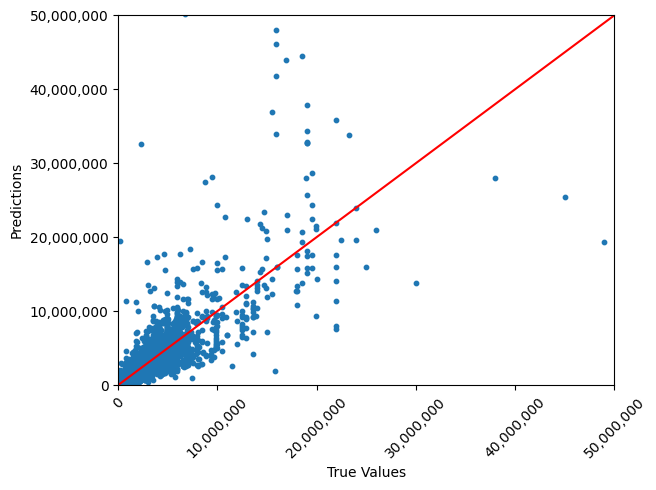

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

largest_num = 5e+7
transformer = models[0]['transform']
model = models[0]['model']
model.eval()
model = model.to('cpu')

df_exclude = df.drop(columns=['price_cleaned'])
df_exclude_np = df_exclude.values
input = transformer(torch.tensor(df_exclude_np, dtype=torch.float32))
output = model(input)
#output_cliped = torch.clamp(output, 6.0, 18.0)
output = torch.exp(output)

plt.scatter(df['price_cleaned'], output.detach().numpy(), s=10, alpha=1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.ylim([0, largest_num])
plt.xlim([0, largest_num])
plt.plot([0, largest_num], [0, largest_num], color='red')

# Set the axes to display whole numbers
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# rotate the x-axis labels
plt.xticks(rotation=45)

plt.show()

In [19]:
# Print model summary
print(models[0]['model'])


FullyConnectedModel(
  (fc1): Linear(in_features=77, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
)


AttributeError: 'FullyConnectedModel' object has no attribute 'summary'

In [12]:
import torch

trues = torch.tensor(df['price_cleaned'].values, dtype=torch.float32)


print(f'min outputs: {torch.min(output).item():.4f}, max outputs: {torch.max(output).item():.4f}')
# Berechnung des R^2-Werts
ss_res = torch.sum((trues - output) ** 2)
ss_tot = torch.sum((trues - torch.mean(trues)) ** 2)

print(f"ss_res: {ss_res.item():.4f}, ss_tot: {ss_tot.item():.4f}")

r2_score = 1 - (ss_res / ss_tot)  # R^2-Formel
print(f"R^2-Wert: {r2_score.item():.4f}")

min outputs: 44824.0781, max outputs: 48190656.0000
ss_res: 2525576731257844269056.0000, ss_tot: 61300058171113472.0000
R^2-Wert: -41199.2344


In [5]:
# get index of max prediction to get original data
index = torch.argmax(output)

print(f'index: {index}, max value: {output[index].item():.0f}')
df.iloc[[int(index)]]

index: 366, max value: 65659968


,Floor,detail_responsive#surface_usable,Floor_space_merged,gde_foreigners_percentage,gde_population,gde_social_help_quota,gde_tax,price_cleaned,Space extracted,Plot_area_unified,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
366,0.0,800.0,0.0,28.144885,2043.0,0.689995,5.67,795000.0,200.0,980.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
index_nr = 1
df_exclude = df.drop(columns=['price_cleaned'])
datapoint = df_exclude.iloc[index_nr].values
print(datapoint)
datapoint = torch.tensor(datapoint, dtype=torch.float32).unsqueeze(0)
transformer = models[0]['transform']

datapoint = transformer(datapoint)


model = models[0]['model']
model.eval()
model = model.to('cpu')
output = model(datapoint)
print(f'output: {output}')
transformer = models[0]['transform']
print(f'mean: {transformer.mean}, std: {transformer.std}')
#output = transformer.inverse(output)
#print(f'output inverst: {output}')
output = torch.exp(output)
print(f'output exp: {output[0][0]:.0f}')

[0.00000000e+00 0.00000000e+00 2.42000000e+02 9.25566343e+00
 1.54500000e+03 2.23425863e+00 5.89000000e+00 1.56000000e+02
 2.22000000e+02 5.00000000e+00 0.00000000e+00 0.00000000e+00
 8.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00]
output: tensor([[13.5669]], grad_fn=<AddmmBackward0>)
mean: tensor([2.1500e+00, 8.8294e-01, 2.4629e+01, 2.4678e+01, 1.3220e+04, 2.7662e+00,
        6.2422e+00, 1.5121e+02, 4.6831e+02, 4.8767e+00, 2.1362e+02, 6.3205e+02,
        1.0192e+01, 4.8822e-02, 1.1532e-01, 4.1612e-01, 3.1292e-02, 5.7949e-04,
        2.8974e-04, 3.1485e-02, 2.4184e-01, 1.9316e-04, 3.2500e-02, 7.2919e-03,
        4.8629e-01, 1.1590e-03, 1.8833e-03, 2.9361e-02

In [7]:
df['price_cleaned'].iloc[index_nr]

np.float64(1420000.0)

In [8]:
df.head()

,Floor,detail_responsive#surface_usable,Floor_space_merged,gde_foreigners_percentage,gde_population,gde_social_help_quota,gde_tax,price_cleaned,Space extracted,Plot_area_unified,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
0,4.000000,121.247562,136.313355,9.255663,1545.0,2.234259,5.89,1150000.0,100.0,1340.042762,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.861332,224.500270,242.000000,9.255663,1545.0,2.234259,5.89,1420000.0,156.0,222.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.000000,129.453708,120.182857,21.358623,21036.0,3.549010,6.05,720000.0,93.0,462.657966,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.126916,232.231722,257.000000,9.255663,1545.0,2.234259,5.89,1430000.0,154.0,370.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,190.906461,177.781407,15.901990,6081.0,1.708126,6.30,995000.0,142.0,32.776514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_loader, val_loader, test_loader = torchModelRun.getDataLoaders(df, 'price_cleaned', 1)

counter = 5
for batch in train_loader:
    print(batch)
    counter -= 1
    if counter == 0:
        break

ValueError: too many values to unpack (expected 3)

In [ ]:
df.std().values.reshape(1, -1)

In [ ]:
df.columns

In [ ]:
import numpy as np
input = 1150000.0
log = np.log(input+1)
min = 0.6931471824645996
max = 17.70733070373535
output = (log - min) / (max - min)

print(f'output: {output}')

output = output * (max - min) + min
output = np.exp(output) - 1
print(f'output: {output}')

# Embedding for Text with BERT

In [ ]:
from transformers import BertModel, BertTokenizer
import torch.nn as nn

class BertForRegression(nn.Module):
    def __init__(self, pretrained_model_name):
        super(BertForRegression, self).__init__()
        self.bert = BertModel.from_pretrained(pretrained_model_name)
        self.regressor = nn.Linear(self.bert.config.hidden_size, 1)
    
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.pooler_output  # `[CLS]` token output
        return self.regressor(cls_output)

In [ ]:
# Train BERT model

model = BertForRegression('bert-base')

epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
loss_fn = nn.MSELoss()

train_loader, val_loader, test_loader = torchModelRun.getDataLoaders(df, 'price_cleaned', 1)

for epoch in range(epochs):
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        target = batch['target']
        output = model(input_ids, attention_mask)
        loss = loss_fn(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


# Kaggle Competition

In [1]:
from sklearn.impute import SimpleImputer, KNNImputer
import os
from src.dataPipeline import DataPipeline


os.chdir('..')

imputer = KNNImputer(n_neighbors=5)
dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=False, imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:43: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:75: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [2]:
df

,Floor,detail_responsive#surface_usable,Floor_space_merged,ForestDensityM,ForestDensityS,RiversAndLakesL,RiversAndLakesM,RiversAndLakesS,distanceToTrainStation,gde_area_forest_percentage,...,Swimming pool,View,Washing machine,Waste water connection,Water connection,Wheelchair access,With a summer house,covered,Availability_Immediately,Availability_On request
0,4.0,187.2,159.2,0.286451,0.090908,0.082170,0.001811,0.011871,3.038467,51.449275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,191.8,242.0,0.286451,0.090908,0.082170,0.001811,0.011871,3.038467,51.449275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,162.0,112.6,0.095877,0.001911,0.154274,0.188229,0.000000,0.909587,32.197891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.2,191.8,257.0,0.286451,0.090908,0.082170,0.001811,0.011871,3.038467,51.449275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,197.6,228.0,0.279276,0.145835,0.109586,0.141473,0.091805,1.460245,49.705635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20791,0.8,67.8,100.8,0.385885,0.097278,0.000000,0.000000,0.000000,1.375319,29.028213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20792,3.8,207.2,249.2,0.000000,0.000000,0.013997,0.000000,0.000000,1.067011,30.599295,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20793,0.0,233.2,318.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.230859,30.599295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20794,1.8,167.8,149.8,0.151363,0.038351,0.026686,0.021426,0.000000,0.357339,26.718547,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
inputs_nums = len(df.columns) - 1
print(f'input nums: {inputs_nums}')

input nums: 60


In [7]:
from src import torchModelRun
import torch
import torch.nn as nn
import torch.nn.functional as F

inputs_nums = len(df.columns) - 1

class FullyConnectedModel(nn.Module):
    import torch.nn.functional as F
    def __init__(self):
        super(FullyConnectedModel, self).__init__()
        self.fc1 = nn.Linear(inputs_nums, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x
    

models = torchModelRun.run(FullyConnectedModel, df, 5)

Epoch 1, Loss: 182.31597115443304, Train MAPE: 77839925.0576923, Test MAPE: 80949120.70769231
Epoch 2, Loss: 166.76681319016677, Train MAPE: 34346591.37692308, Test MAPE: 35584276.384615384
Epoch 3, Loss: 131.00556689775908, Train MAPE: 2311189.860576923, Test MAPE: 2355694.962980769
Epoch 4, Loss: 43.89569594218181, Train MAPE: nan, Test MAPE: 4442.224892014724
Epoch 5, Loss: 13.990102921999418, Train MAPE: nan, Test MAPE: 938.2629087594839
Epoch 6, Loss: 7.851106465665194, Train MAPE: 603.8225309518667, Test MAPE: 594.1052240224985
Epoch 7, Loss: 5.12880457049379, Train MAPE: 332.892286997575, Test MAPE: 328.2939253146832
Epoch 8, Loss: 3.717655853296702, Train MAPE: 248.59473959482634, Test MAPE: 245.8888848231389
Epoch 9, Loss: 2.8724275996478705, Train MAPE: 197.3469076670133, Test MAPE: 195.94455155592698
Epoch 10, Loss: 2.3248596731573343, Train MAPE: 174.82429721538838, Test MAPE: 174.7405268742488
Epoch 11, Loss: 1.9454785069880578, Train MAPE: 158.53121710190408, Test MAPE: 1

test_loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_mape,█▅▄▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
time_test,▄▄▄▃▂▄▃▄▅▂▇▇▅▃▂▂▃▂▁▁▂▃▃▃▄▂▃▂▂▃▃▄▃▂▃▁▂▂█▃
time_train,▄▁▂▃▄▃▂▁▂▂▂▄▄▄▃▄▄▄▄▄▄▃▃▃▃▄▄▃▃▃▃▃▃▄▃▃▄█▄▂
train_loss,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_mape,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,0.12026
test_mape,26.08581
time_test,1.38516
time_train,2.55458
train_loss,0.09602


In [9]:
df_test_kaggle = dp.runPipeline(filePath='C:/Users/denis/Downloads/test_data-Kaggle-v0.11.csv/test_data-Kaggle-v0.11.csv', normalizeAndStandardize=False, imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:43: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,48,49,104,111,112,115,116,117,120,121,122,124,127,128,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:70: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:75: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-

In [10]:
df_test_kaggle

,Floor,detail_responsive#surface_usable,Floor_space_merged,ForestDensityM,ForestDensityS,RiversAndLakesL,RiversAndLakesM,RiversAndLakesS,distanceToTrainStation,gde_area_forest_percentage,...,Swimming pool,View,Washing machine,Waste water connection,Water connection,Wheelchair access,With a summer house,covered,Availability_Immediately,Availability_On request
0,2.4,152.6,193.8,0.100030,0.063548,0.020765,0.034714,0.051031,0.487037,44.392083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,152.6,193.8,0.170434,0.083253,0.017035,0.033235,0.053474,0.691089,44.392083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.4,121.6,198.6,0.357984,0.125505,0.127272,0.067030,0.000000,2.689617,51.449275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.2,152.6,140.0,0.076610,0.000000,0.024733,0.030412,0.000000,0.447804,44.392083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.6,113.0,242.0,0.286451,0.090908,0.082170,0.001811,0.011871,3.038467,51.449275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24551,2.0,202.4,64.2,0.018827,0.000000,0.000000,0.000000,0.000000,9.851342,27.252973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24552,3.0,202.4,64.2,0.003706,0.011718,0.000000,0.000000,0.000000,9.753366,27.252973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24553,2.4,162.0,64.2,0.003706,0.011718,0.000000,0.000000,0.000000,9.753366,27.252973,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24554,2.0,202.4,64.2,0.003706,0.011718,0.000000,0.000000,0.000000,9.753366,27.252973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
model = models[0]['model']
model.eval()
test_data = models[0]['transform'](torch.tensor(df_test_kaggle.values, dtype=torch.float32))
output = model(test_data)

#clamp output
output = torch.clamp(output, 6.0, 18.0)
output = torch.exp(output)

In [12]:
output.min(), output.max()


(tensor(123131.2812, grad_fn=<MinBackward1>),
 tensor(65659968., grad_fn=<MaxBackward1>))

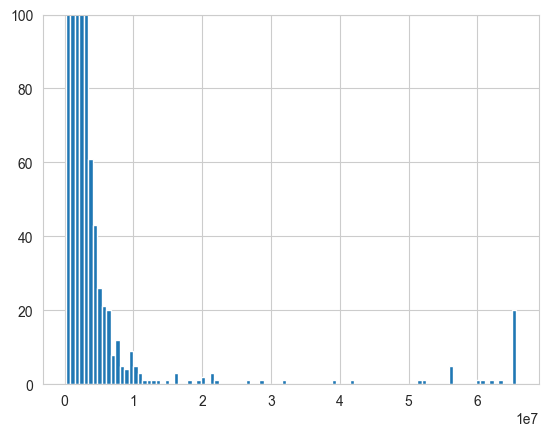

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


plt.hist(output.detach().numpy(), bins=100)
plt.ylim([0, 100])
plt.show()

In [17]:
import pandas as pd

df_test_kaggle_unclean = pd.read_csv('C:/Users/denis/Downloads/test_data-Kaggle-v0.11.csv/test_data-Kaggle-v0.11.csv')
df_test_kaggle_unclean

C:\Users\denis\AppData\Local\Temp\ipykernel_30592\4266205768.py:3: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,48,49,104,111,112,115,116,117,120,121,122,124,127,128,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test_kaggle_unclean = pd.read_csv('C:/Users/denis/Downloads/test_data-Kaggle-v0.11.csv/test_data-Kaggle-v0.11.csv')


,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned,Type:,Hall height:
0,0,0,Suhr,220 m²,733 m²,NaN,On request,"Galeggenweg 95034 Suhr, AG","6.5 rooms, 220 m²«Landhausvilla mit einzigarti...",DescriptionVilla lädt zum Träumen ein Wir ver...,...,NaN,NaN,NaN,5034.0,NaN,NaN,NaN,220.0,NaN,NaN
1,1,1,Suhr,230 m²,702 m²,NaN,On request,"Hofstattmattenweg 195034 Suhr, AG","7.5 rooms, 230 m²«Grosszügiges Anwesen mit tra...","DescriptionLicht, Glas und Holz - ein freisteh...",...,NaN,NaN,NaN,5034.0,NaN,NaN,NaN,230.0,NaN,NaN
2,2,2,Biberstein,131 m²,NaN,NaN,On request,"Gheldweg 105023 Biberstein, AG","4.5 rooms, 131 m²«Terrassenhaus mit traumhafte...",DescriptionLage Das 4.5-Zimmer-Terrassenhaus ...,...,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,131.0,NaN,NaN
3,3,3,Suhr,140 m²,206 m²,140 m²,Immediately,"Obere Dorfstrasse 275034 Suhr, AG","6.5 rooms, 140 m²«Mittelhaus in Suhr an attrak...",DescriptionReiheneinfamilienhaus (Mittelhaus) ...,...,NaN,NaN,NaN,5034.0,NaN,NaN,NaN,140.0,NaN,NaN
4,4,4,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Bezugsbereit - ruhige Lage u...",DescriptionStilvolle Liegenschaft an ruhiger L...,...,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,156.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24551,24561,24561,Wildhaus,NaN,NaN,NaN,NaN,"Hof 2, 9658 Wildhaus",1.5 Zimmerwohnung an zentraler Lage mit schöne...,"Description\n""Schöne Kleinwohnung mit Cheminée...",...,NaN,NaN,NaN,9658.0,NaN,NaN,NaN,36.0,Apartment,NaN
24552,24562,24562,Wildhaus,NaN,NaN,NaN,NaN,9658 Wildhaus,OBJEKT IST BEREITS RESERVIERT!!Sie suchen eine...,"Description\n""BEREITS RESERVIERT!""\nOBJEKT IST...",...,NaN,6.0,NaN,9658.0,NaN,NaN,NaN,NaN,Apartment,NaN
24553,24563,24563,Wildhaus,NaN,NaN,NaN,NaN,9658 Wildhaus,Mitten im Ober - Toggenburg ist ein 4 Zimmer C...,"Description\n""Chalet mit grossem Grundstück""\n...",...,NaN,1.0,NaN,9658.0,NaN,NaN,NaN,800.0,Single house,NaN
24554,24564,24564,Wildhaus,NaN,NaN,NaN,NaN,9658 Wildhaus,Zu verkaufen ist hier in Wildhaus eine schön u...,"Description\n""5½ Zimmer Ferienwohnung mit Gara...",...,NaN,4.0,NaN,9658.0,NaN,NaN,NaN,NaN,Apartment,NaN


In [19]:
df_test_results = pd.DataFrame(columns=['Id','Expected'])
df_test_results['Id'] = df_test_kaggle_unclean['Unnamed: 0']
df_test_results['Expected'] = output.detach().numpy()
df_test_results.to_csv('kaggle_results.csv', index=False)

In [15]:
# store model for later use
torch.save(model, 'model.pt')

#store transformer for later use
torch.save(models[0]['transform'], 'transformer.pt')